<a href="https://colab.research.google.com/github/s2li2/AIDL/blob/main/Pre_trained_CNN_model_codeURL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/healthy')))
print(len(os.listdir('/content/drive/MyDrive/train/diseased')))
print(len(os.listdir('/content/drive/MyDrive/test/healthy')))
print(len(os.listdir('/content/drive/MyDrive/test/diseased')))

1550
1550
472
472


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 2480 images belonging to 2 classes.
Found 620 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 0s 0us/step


In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [7]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
78/78 [==============================] - 931s 12s/step - loss: 1.0421 - accuracy: 0.6226 - val_loss: 0.3692 - val_accuracy: 0.8742
Epoch 2/3
78/78 [==============================] - 905s 12s/step - loss: 0.7208 - accuracy: 0.6460 - val_loss: 0.2349 - val_accuracy: 0.9839
Epoch 3/3
78/78 [==============================] - 908s 12s/step - loss: 0.6593 - accuracy: 0.6806 - val_loss: 0.3035 - val_accuracy: 0.9661


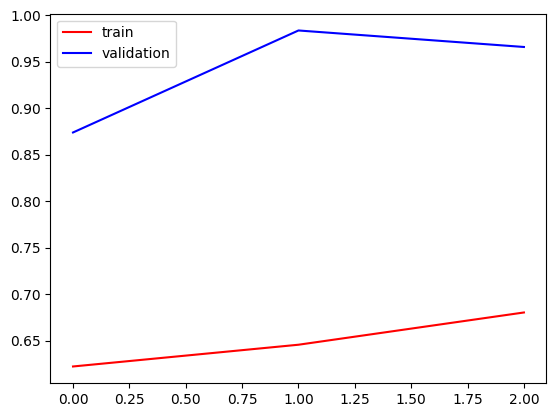

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

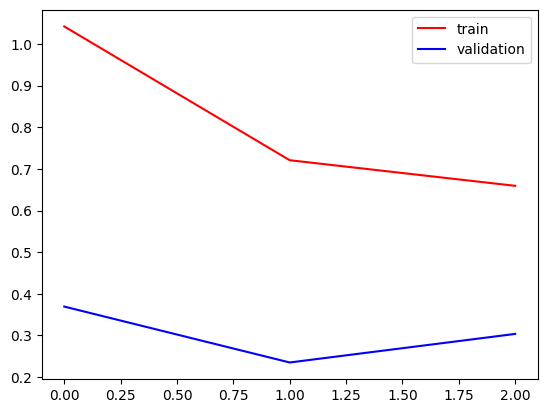

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 944 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

30/30 [==============================] - 293s 10s/step
[[0.17901678]
 [0.540111  ]
 [0.7818963 ]
 [0.8984275 ]
 [0.96693575]
 [0.6323439 ]
 [0.21032833]
 [0.14749081]
 [0.7542544 ]
 [0.75374424]
 [0.24881521]
 [0.12720343]
 [0.74465364]
 [0.6520718 ]
 [0.72041076]
 [0.94048434]
 [0.67507386]
 [0.68710077]
 [0.21615987]
 [0.6073853 ]
 [0.276985  ]
 [0.6946364 ]
 [0.16571675]
 [0.6594354 ]
 [0.04457916]
 [0.32697207]
 [0.9415545 ]
 [0.3025942 ]
 [0.9983125 ]
 [0.9151896 ]
 [0.21684855]
 [0.66055113]
 [0.13006273]
 [0.71968955]
 [0.83002156]
 [0.90499824]
 [0.8093039 ]
 [0.18534835]
 [0.55433136]
 [0.8298318 ]
 [0.6044359 ]
 [0.8338463 ]
 [0.18434414]
 [0.7869254 ]
 [0.89131635]
 [0.91565377]
 [0.9104409 ]
 [0.6879495 ]
 [0.15765302]
 [0.26326495]
 [0.9293338 ]
 [0.62110734]
 [0.4057314 ]
 [0.79843146]
 [0.8554016 ]
 [0.6223026 ]
 [0.81254464]
 [0.9212023 ]
 [0.8348829 ]
 [0.81600344]
 [0.8625196 ]
 [0.24948564]
 [0.6507263 ]
 [0.908928  ]
 [0.7198267 ]
 [0.36497608]
 [0.1918403 ]
 [0.661

In [13]:
len(predictions)

944

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

#Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[164 308]
 [163 309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.35      0.41       472
           1       0.50      0.65      0.57       472

    accuracy                           0.50       944
   macro avg       0.50      0.50      0.49       944
weighted avg       0.50      0.50      0.49       944

